

```
CORRECT CODE
```



Import all the required libraries

In [ ]:
#upgrading library
!pip install --upgrade keras
!pip install --upgrade tensorflow
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


Import file for creating digit dataset

In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

Saving final.zip to final.zip


In [ ]:
import os

# Replace 'your_folder_name' with the desired folder name
folder_name = 'final'

# Specify the path where you want to create the folder
folder_path = '/content/' + folder_name

# Create the folder
os.makedirs(folder_path, exist_ok=True)

# Check if the folder is created successfully
if os.path.exists(folder_path):
    print(f"Folder '{folder_name}' created successfully at '{folder_path}'.")
else:
    print(f"Failed to create folder '{folder_name}'.")

Folder 'final' created successfully at '/content/final'.


Unzip file and create directory

In [ ]:
import zipfile

# Replace 'your_uploaded_file.zip' with the actual name of your uploaded zip file
zip_file_path = '/content/final.zip'

# Specify the extraction directory
extracted_path = '/content/digits'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extraction directory
print("Contents of the extraction directory:")
print(os.listdir(extracted_path))


Contents of the extraction directory:
['final']


LOADING DATA:-
We are going to use an image dataset to classify the numbers in an image. Data is specified as features like images and labels as tags.

In [ ]:
# Loading the data
data = os.listdir("/content/digits/final")
data_X = []
data_y = []
data_classes = len(data)

for i in range(0, data_classes):
    data_list = os.listdir("digits/final/" + str(i))

    for j in data_list:
        pic = cv2.imread("digits/final/" + str(i) + "/" + j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i)

if len(data_X) == len(data_y):
    print("Total Datapoints =", len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)


Total Datapoints = 10160


SPLITTING DATASET:-
We are splitting the dataset into the train, test, and validation sets as we do in any machine learning problem.

In [ ]:
#Spliting the train validation and test sets
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


Preprocessing the images for neural network:-
In a preprocessing step, we preprocess the features (images) into grayscale, normalizing and enhancing them with histogram equalization. After that, convert them to NumPp arrays then reshaping them and data augmentation.

In [ ]:
def Prep(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
  img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
  img = img/255 #normalizing
  return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)
#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

One Hot Encoding



In [ ]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

MODEL BUILDING

In [ ]:
#Creating a Neural Network
model = Sequential()
model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 60)        1560      
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 60)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 30)        16230     
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 30)          0         
 ng2D)                                                

use below link for refrence(it helps u undertsand next step)
basically it describes nueral network behaviour

https://chat.openai.com/c/00fd2d4a-7bb2-4495-bc70-47fb75edbad7

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 60)        1680      
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 60)        32460     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 30)        16230     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 30)        8130      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 30)          0         
 g2D)                                                 

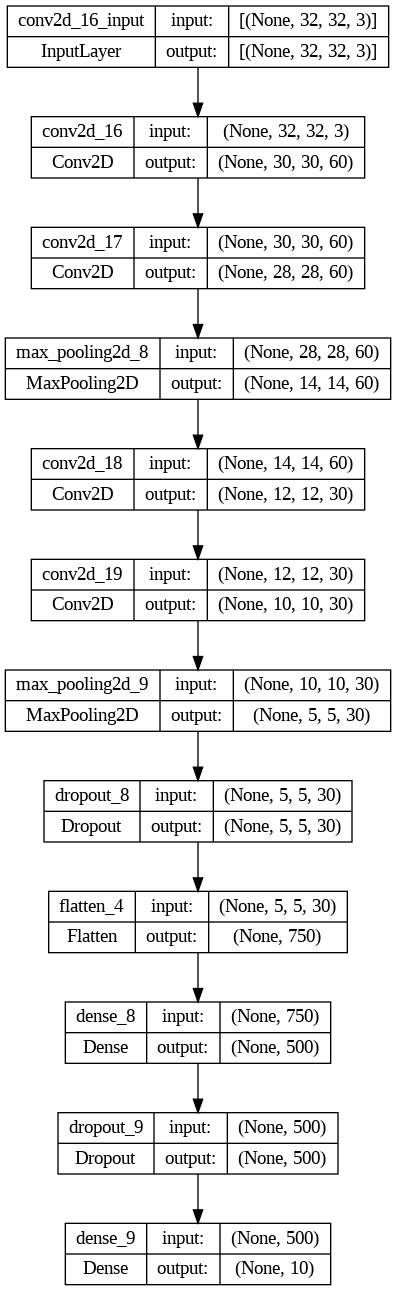

In [ ]:
# Install required packages
!pip install tensorflow matplotlib

# Import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

# Build the model
model = Sequential([
    Conv2D(60, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(60, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(30, (3, 3), activation='relu'),
    Conv2D(30, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the model (you need to have your training data)
# Replace X_train and y_train with your actual training data
# model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Once the training is done, you can plot training history
# history = model.fit(...) # replace ... with your training parameters
# plot training history
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')
# plt.show()


rerun the prior before code

In [ ]:
# Import the necessary libraries
from keras.optimizers import RMSprop
from keras.optimizers import schedules

# ...

# Compiling the model
learning_rate = 0.001
rho = 0.9
epsilon = 1e-08

# Create a learning rate schedule if needed
learning_rate_schedule = schedules.ExponentialDecay(initial_learning_rate=learning_rate, decay_steps=100000, decay_rate=0.96)

optimizer = RMSprop(learning_rate=learning_rate_schedule, rho=rho, epsilon=epsilon)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                    epochs=30,
                    validation_data=(valid_X, valid_y),
                    verbose=2,
                    steps_per_epoch=200)

# Testing the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ', score[0])
print('Test Accuracy =', score[1])


Epoch 1/30
200/200 - 124s - loss: 1.0762 - accuracy: 0.6299 - val_loss: 0.0748 - val_accuracy: 0.9814 - 124s/epoch - 621ms/step
Epoch 2/30
200/200 - 110s - loss: 0.2859 - accuracy: 0.9048 - val_loss: 0.0699 - val_accuracy: 0.9808 - 110s/epoch - 548ms/step
Epoch 3/30
200/200 - 106s - loss: 0.1982 - accuracy: 0.9345 - val_loss: 0.0456 - val_accuracy: 0.9896 - 106s/epoch - 532ms/step
Epoch 4/30
200/200 - 118s - loss: 0.1506 - accuracy: 0.9473 - val_loss: 0.0324 - val_accuracy: 0.9917 - 118s/epoch - 591ms/step
Epoch 5/30
200/200 - 106s - loss: 0.1320 - accuracy: 0.9599 - val_loss: 0.0263 - val_accuracy: 0.9917 - 106s/epoch - 531ms/step
Epoch 6/30
200/200 - 103s - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.0256 - val_accuracy: 0.9933 - 103s/epoch - 514ms/step
Epoch 7/30
200/200 - 107s - loss: 0.1027 - accuracy: 0.9683 - val_loss: 0.0175 - val_accuracy: 0.9943 - 107s/epoch - 533ms/step
Epoch 8/30
200/200 - 108s - loss: 0.0915 - accuracy: 0.9702 - val_loss: 0.0197 - val_accuracy: 0.9948 - 

Epoch value analysis(extra)

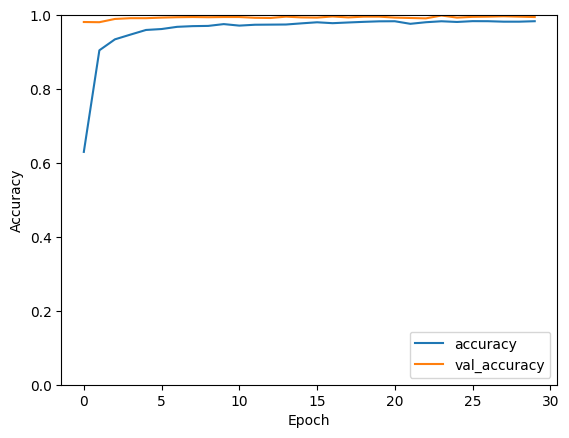

In [ ]:
# prompt: plot graph for above epoch value..anlyse them

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


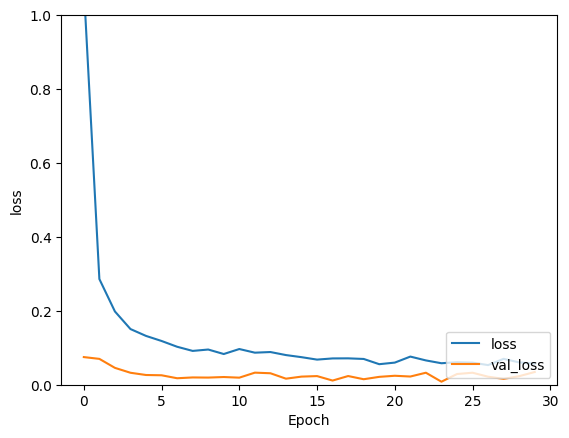

In [ ]:
# prompt: plot graph for above epoch value..anlyse them

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Load images of unsolved sudoku

In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

Saving sudoku.zip to sudoku.zip


In [ ]:
import zipfile
import os

def unzip_file(zip_path):
    # Extract the base name of the zip file (without extension)
    folder_name = os.path.splitext(os.path.basename(zip_path))[0]

    # Create a folder using the zip file's base name
    extract_folder = os.path.join(os.path.dirname(zip_path), folder_name)

    # Create the target folder if it doesn't exist
    if not os.path.exists(extract_folder):
        os.makedirs(extract_folder)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all the contents into the target folder
        zip_ref.extractall(extract_folder)

    print(f"Successfully unzipped '{zip_path}' to '{extract_folder}'")

# Example usage:
zip_file_path = '/content/sudoku.zip'
unzip_file(zip_file_path)


Successfully unzipped '/content/sudoku.zip' to '/content/sudoku'


using a image from model to train

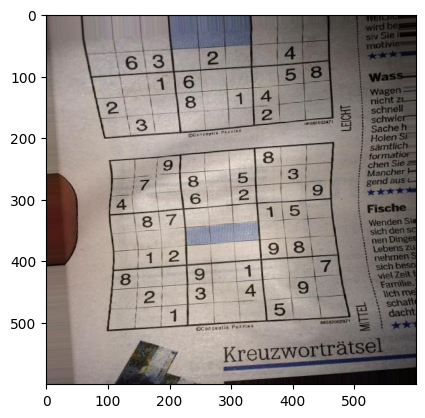

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder = "sudoku/aug"
image_files = [f for f in os.listdir(folder) if f.lower().endswith((".jpeg", ".jpg"))]

if not image_files:
    print("No valid image files (JPEG) found in the folder.")
else:
    a = random.choice(image_files)
    sudoku_a = cv2.imread(os.path.join(folder, a))

    if sudoku_a is None:
        print(f"Error loading image: {a}")
    else:
        sudoku_a = cv2.cvtColor(sudoku_a, cv2.COLOR_BGR2RGB)
        sudoku_a = sudoku_a.astype(np.uint8)
        plt.figure()
        plt.imshow(sudoku_a)
        plt.show()

pre-process image (model)

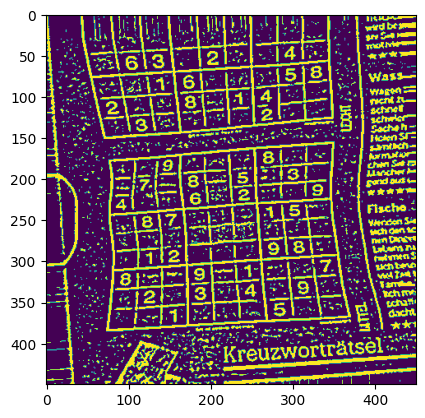

In [ ]:
import cv2
import matplotlib.pyplot as plt

sudoku_a = cv2.resize(sudoku_a, (450, 450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    # blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    return threshold_img

threshold = preprocess(sudoku_a)

# let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

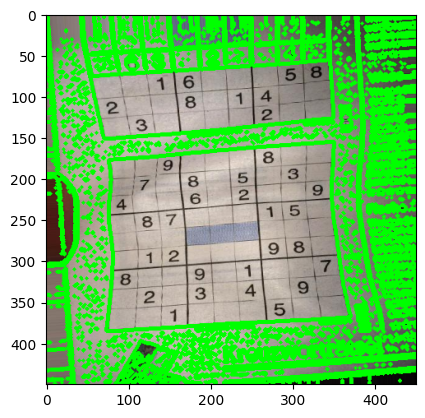

In [ ]:
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

final model image after processing

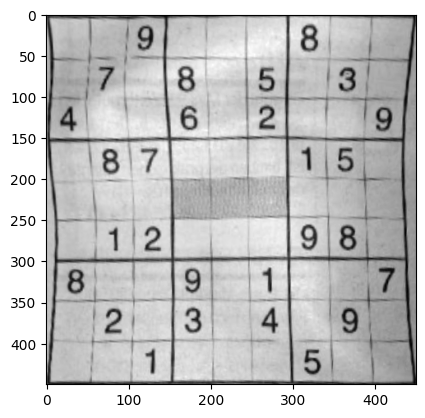

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis=1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img, 9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r, 9)
        for box in cols:
            boxes.append(box)
    return boxes

# Assuming you have the necessary variable definitions here

black_img = np.zeros((450, 450, 3), np.uint8)
biggest, maxArea = main_outline(contour)

if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2, [biggest], -1, (0, 255, 0), 10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imagewrap = cv2.warpPerspective(sudoku_a, matrix, (450, 450))
    imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(imagewrap, cmap='gray')
    plt.show()

Importing puzzle to be solved

In [ ]:
from google.colab import files

# Upload image
uploaded = files.upload()

# Get the path of the uploaded file
if len(uploaded) > 0:
    file_path = list(uploaded.keys())[0]
    print("Uploaded file path:", file_path)

Saving file.jpg to file.jpg
Uploaded file path: file.jpg


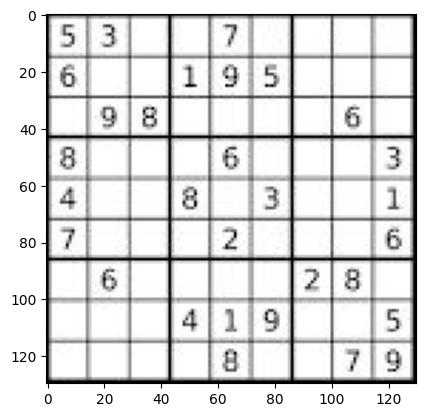

In [ ]:
puzzle = cv2.imread("/content/file.jpg")
#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

pre-proccess question image


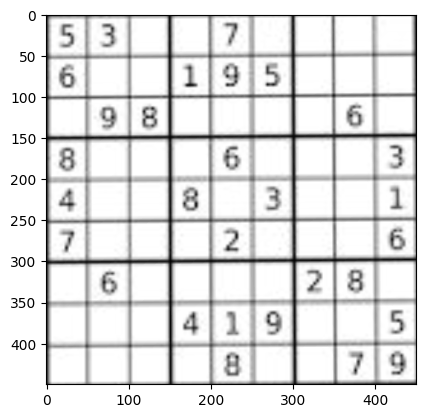

In [ ]:
# Finding the outline of the sudoku puzzle in the image
su_contour_1 = puzzle.copy()
su_contour_2 = sudoku_a.copy()

# Convert the image to grayscale
puzzle_gray = cv2.cvtColor(puzzle, cv2.COLOR_BGR2GRAY)

# Find contours on the grayscale image
su_contour, hierarchy = cv2.findContours(puzzle_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour, -1, (0, 255, 0), 3)

black_img = np.zeros((450, 450, 3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)

if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2, su_biggest, -1, (0, 255, 0), 10)

    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1, su_pts2)

    su_imagewrap = cv2.warpPerspective(puzzle, su_matrix, (450, 450))
    su_imagewrap = cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.imshow(su_imagewrap, cmap='gray')
    plt.show()


Split cell and classify digits

First split the Sudoku into 81 cells with digits or empty spaces

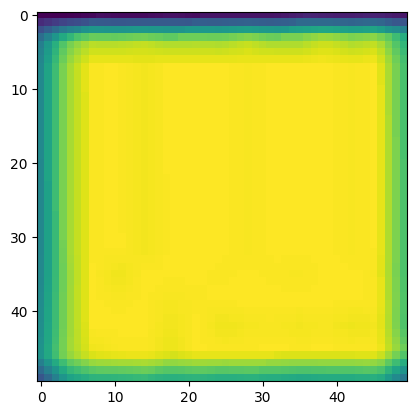

In [ ]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()

Cropping the cells

In [ ]:
def CropCell(cells):
    Cells_cropped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_cropped.append(img)
    return Cells_cropped

sudoku_cell_cropped = CropCell(sudoku_cell)

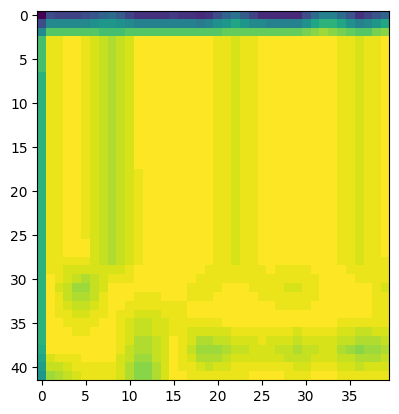

In [ ]:
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_cropped[58])
plt.show()

ocr and array generation


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr
import pytesseract
import numpy as np
import cv2
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Create an empty 9x9 grid
grid = [[0] * 9 for _ in range(9)]

# Define desired width and height for image preprocessing
desired_width = 50
desired_height = 50

# Function to extract digits from cell images using OCR
def extract_digit(cell_img):
    # Increase thresholding for binarization
    _, cell_img = cv2.threshold(cell_img, 150, 255, cv2.THRESH_BINARY)

    # Resize and preprocess the image
    cell_img = cv2.resize(cell_img, (desired_width, desired_height))
    cell_img = cv2.GaussianBlur(cell_img, (5, 5), 0)

    digit = pytesseract.image_to_string(cell_img, config='--psm 6 outputbase digits')
    return digit.strip()  # Remove leading/trailing whitespaces

# Fill the grid with the contents of sudoku_cell_cropped
for i in range(9):
    for j in range(9):
        # Convert the image to a numpy array
        cell_array = np.array(sudoku_cell_cropped[i * 9 + j])
        # Extract the digit from the cell image
        digit = extract_digit(cell_array)
        # Set the grid value to the extracted digit (0 for empty cells)
        grid[i][j] = int(digit) if digit.isdigit() else 0

# SOLVING THE SUDOKU
def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

def possible(quiz, row, col, n):
    for i in range(9):
        if quiz[row][i] == n and col != i:
            return False
    for i in range(9):
        if quiz[i][col] == n and row != i:
            return False

    row0 = (row) // 3
    col0 = (col) // 3
    for i in range(row0 * 3, row0 * 3 + 3):
        for j in range(col0 * 3, col0 * 3 + 3):
            if quiz[i][j] == n and (i, j) != (row, col):
                return False
    return True

def solve(quiz):
    val = next_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1, 10):  # n is the possible solution
            if possible(quiz, row, col, n):
                quiz[row][col] = n
                if solve(quiz):
                    return True
                else:
                    quiz[row][col] = 0
        return False  # return False if no valid solution is found

# Solve the Sudoku puzzle
solve(grid)

# Print the solved Sudoku grid
print("Solved Sudoku:")
for row in grid:
    print(row)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Solved Sudoku:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 0, 0, 0, 0, 3]
[4, 0, 0, 3, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 0, 9, 0, 0, 5]
[0, 0, 0, 0, 0, 0, 0, 7, 0]


final question image


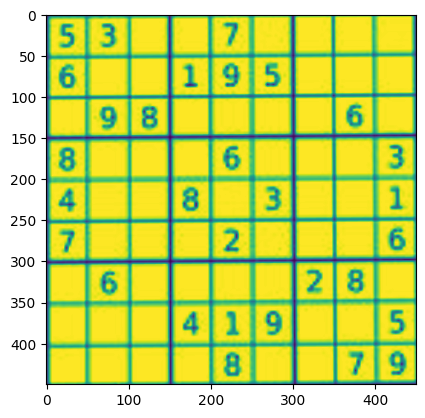

In [ ]:
#For compairing
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

generating output image from solved array

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Create a blank image
image_size = (450, 450)
cell_size = (image_size[0] // 9, image_size[1] // 9)
border_width = 2

image = Image.new("RGB", image_size, "white")
draw = ImageDraw.Draw(image)

# Set font and size
font_size = 30
font = ImageFont.load_default()

# Draw Sudoku digits and borders on the image
for i in range(9):
    for j in range(9):
        digit = solved_sudoku[i][j]
        x = j * cell_size[0]
        y = i * cell_size[1]

        # Draw cell border
        draw.rectangle([x, y, x + cell_size[0], y + cell_size[1]], outline="black", width=border_width)

        # Draw digit in the center of the cell
        if digit != 0:
            text_size = draw.textsize(str(digit), font=font)
            position = (x + (cell_size[0] - text_size[0]) // 2, y + (cell_size[1] - text_size[1]) // 2)
            draw.text(position, str(digit), font=font, fill="black")

# Save the image
image.save('solved_sudoku_image_with_borders.png')
